## Importing libraries

In [1]:
import pandas as pd
import numpy as np
# generate gaussian data
from numpy.random import seed, randn
from numpy import mean, std
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Data cleaning and Analysis

In [5]:
# Since there are no missing values, lets check for duplicate values
df.duplicated().sum()

313

In [6]:
# lets drop duplicate values
df.drop_duplicates(inplace=True)

In [7]:
#checking if change has been applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [8]:
# ID,wheel,doors,leather interior,cylinder and levy column is not really needed for the analysis, so lets remove it from the dataset
df.drop(['ID','Wheel','Doors','Leather interior','Cylinders','Levy','Drive wheels','Engine volume',], axis=1, inplace=True)

lets remove some characters and update some of the data type

In [9]:
df['Price'] = df['Price'].astype('float')
df['Mileage'] = df['Mileage'].str.replace('km','').astype(float)


In [10]:
# lets check if change is applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          18924 non-null  float64
 1   Manufacturer   18924 non-null  object 
 2   Model          18924 non-null  object 
 3   Prod. year     18924 non-null  int64  
 4   Category       18924 non-null  object 
 5   Fuel type      18924 non-null  object 
 6   Mileage        18924 non-null  float64
 7   Gear box type  18924 non-null  object 
 8   Color          18924 non-null  object 
 9   Airbags        18924 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.6+ MB


<AxesSubplot:>

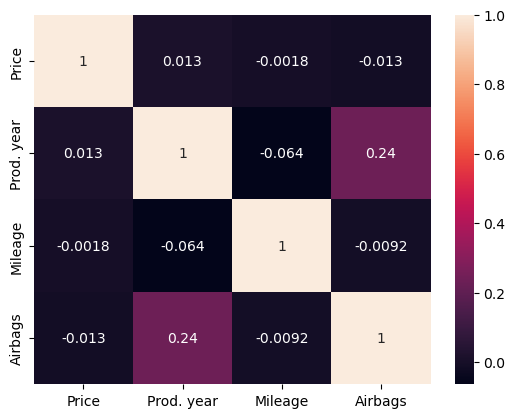

In [11]:
# Lets look at correlation of columns amongs themselves
sns.heatmap(df.corr(), annot=True)

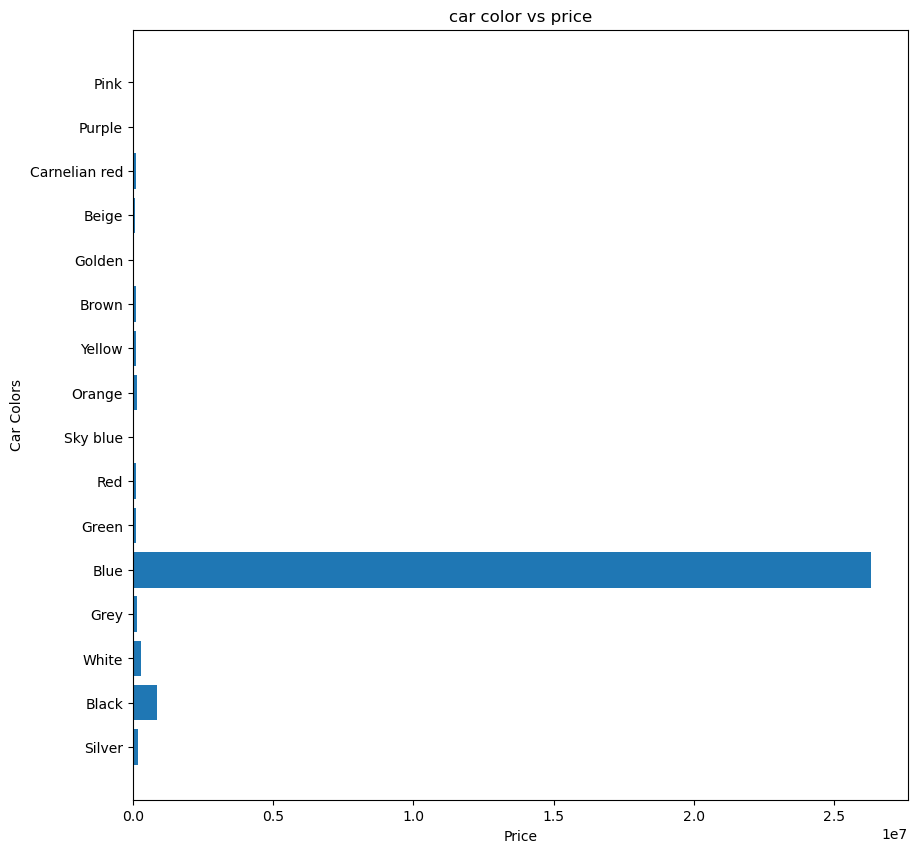

In [12]:
plt.figure(figsize=[10,10])
plt.barh(df['Color'], df['Price']);
plt.title('car color vs price');
plt.xlabel('Price')
plt.ylabel('Car Colors');

From the graph we notice that blue cars are the most expensive cars

In [13]:
def top_ten(df, column, t, x_label, y_label):
    df[column].value_counts()[:10].plot(kind='bar');
    plt.title(t);
    plt.xlabel(x_label)
    plt.ylabel(y_label);

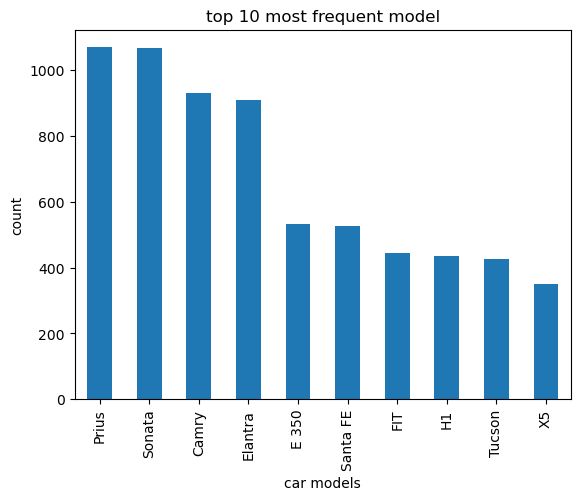

In [14]:
# most frequent car model
top_ten(df, 'Model', 'top 10 most frequent model',
       'car models', 'count')

The above graph shows the top 10 standard car models listed on the dataset with Prius followed by Sonata being the most listed among other car models.

In [15]:
prius = df[df['Model'] == 'Prius']

In [16]:
prius.Price.describe()

count     1069.000000
mean     11436.182413
std       8089.894513
min          9.000000
25%       2352.000000
50%      12544.000000
75%      17249.000000
max      53314.000000
Name: Price, dtype: float64

We can see that 50% of Prius cars are sold at the price of 12,544 dollars, while the maximum price for a Prius car is 53,314 dollars. The lowest price listed on a Prius car is $9.

In [17]:
sonata = df[df['Model'] == 'Sonata']

In [18]:
sonata.Price.describe()

count     1067.000000
mean     14379.360825
std      12867.215257
min          3.000000
25%       8545.500000
50%      11917.000000
75%      15681.000000
max      73620.000000
Name: Price, dtype: float64

We can see that Sonata with the difference of 3 compare to Prius has 50% of its cars sold at the price of 11,917 dollars, while the maximum price for a Sonata car is 73620 dollars. The lowest price listed on a Sonata car is $3

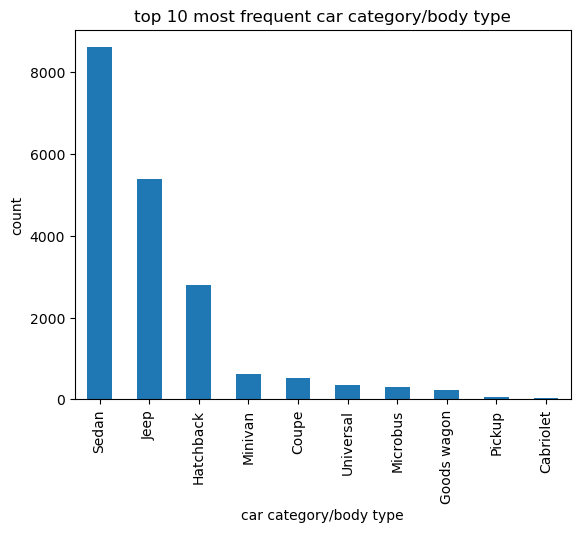

In [19]:
# lets also take a look at car category which can also be refered to as car body type
top_ten(df, 'Category', 'top 10 most frequent car category/body type',
       'car category/body type', 'count')

As we can see, over 8,000 cars listed have **Sedan** body type followed by **Jeep** which have listing of approximately 6,000 cars. Both category or body types are the most purchased kind of cars.

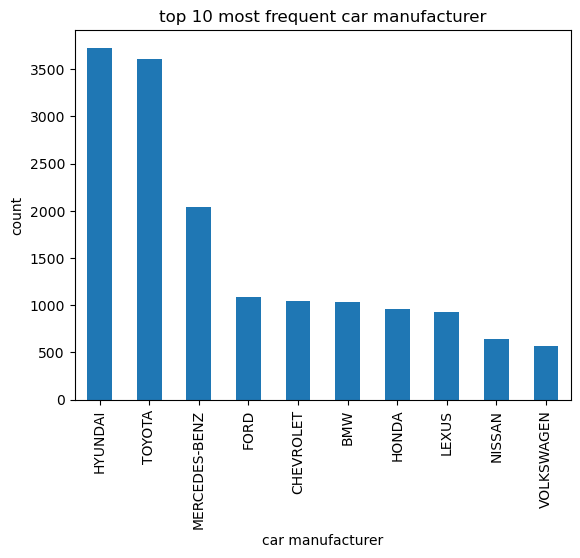

In [20]:
# lets also take a look at car Manufacturer 
top_ten(df, 'Manufacturer', 'top 10 most frequent car manufacturer',
       'car manufacturer', 'count')

As we can see, More than 3,500 cars are from **HYUNDAI** manufacturer followed by **TOYOTA** manufacturer. Both manufacturer car are the most sold car.

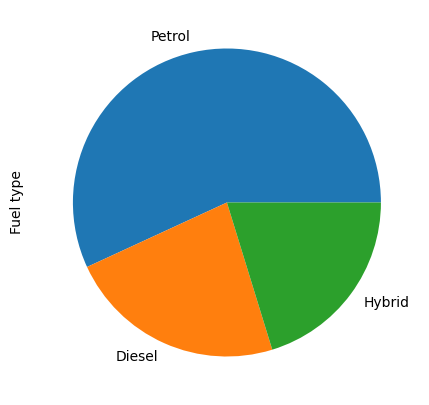

In [21]:
# Lets take a look at what fuel type is most common on the dataset
plt.figure(figsize=[10,5])
df['Fuel type'].value_counts()[:3].plot(kind='pie');

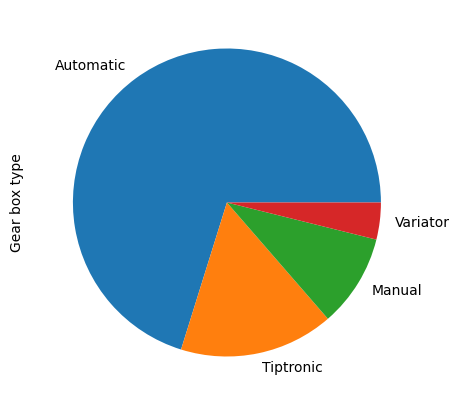

In [22]:
# Lets take a look at what Gear box type is most common on the dataset
plt.figure(figsize=[10,5])
df['Gear box type'].value_counts().plot(kind='pie');

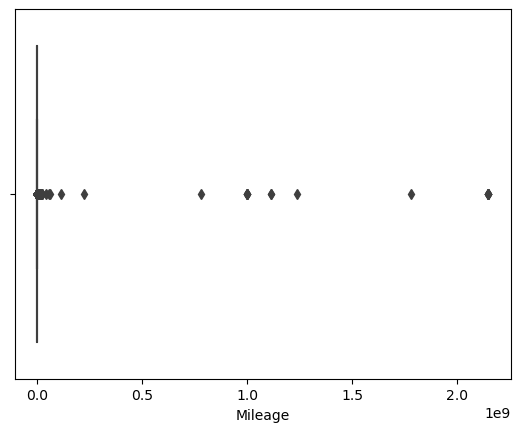

In [23]:
# lets get detauls about car mileage
sns.boxplot(df['Mileage']);

From the above graph we can see that on average, most of the cars can travel 100,000,000(1x10^9)km per litre of fuel and we can see some outliers in the dataset.

In [24]:
df['Prod. year'].describe()

count    18924.000000
mean      2010.914236
std          5.665749
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64

## Model building

- Encoding categorical columns

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
columns = ['Color','Manufacturer','Model',
           'Fuel type', 'Category','Gear box type']

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Mileage,Gear box type,Color,Airbags
0,13328.0,32,1242,2010,4,2,186005.0,0,12,12
1,16621.0,8,658,2011,4,5,192000.0,2,1,8
2,8467.0,21,684,2006,3,5,200000.0,3,1,2
3,3607.0,16,661,2011,4,2,168966.0,0,14,0
4,11726.0,21,684,2014,3,5,91901.0,0,12,4


In [28]:
#splitting dataset into dependent and independent variable
X = df.drop('Price', axis=1)
y = df['Price']

In [29]:
X

,Manufacturer,Model,Prod. year,Category,Fuel type,Mileage,Gear box type,Color,Airbags
0,32,1242,2010,4,2,186005.0,0,12,12
1,8,658,2011,4,5,192000.0,2,1,8
2,21,684,2006,3,5,200000.0,3,1,2
3,16,661,2011,4,2,168966.0,0,14,0
4,21,684,2014,3,5,91901.0,0,12,4
...,...,...,...,...,...,...,...,...,...
19232,36,385,1999,1,0,300000.0,1,12,5
19233,23,1334,2011,9,5,161600.0,2,11,8
19234,23,1442,2010,4,1,116365.0,0,7,4
19235,8,456,2007,4,1,51258.0,0,1,4


In [30]:
y.head()

0    13328.0
1    16621.0
2     8467.0
3     3607.0
4    11726.0
Name: Price, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Support Vector Regression

In [34]:
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [35]:
print(f'r2 score = {r2_score(y_test, svr_pred)}')
print(f'MAE = {mean_absolute_error(y_test, svr_pred)}')
print(f'MSE = {mean_squared_error(y_test, svr_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, svr_pred))}')

r2 score = -0.03822662402127408
MAE = 12258.702931694173
MSE = 591786258.9768342
RMSE = 24326.657373688522


### Random Forest

In [36]:
rand = RandomForestRegressor()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)

In [37]:
print(f'r2 score = {r2_score(y_test, rand_pred)}')
print(f'MAE = {mean_absolute_error(y_test, rand_pred)}')
print(f'MSE = {mean_squared_error(y_test, rand_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, rand_pred))}')

r2 score = -18.209560722639807
MAE = 9207.958862358324
MSE = 10949395646.018808
RMSE = 104639.35992741359


### Decision Tree

In [38]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

In [39]:
print(f'r2 score = {r2_score(y_test, tree_pred)}')
print(f'MAE = {mean_absolute_error(y_test, tree_pred)}')
print(f'MSE = {mean_squared_error(y_test, tree_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, tree_pred))}')

r2 score = 0.1445412643908871
MAE = 7087.597440884447
MSE = 487609076.03617394
RMSE = 22081.872113481997


### Model Evaluation

From among the Three models, Decision Tree Regressor performed better accross all metrics and should be used 

In [40]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
#Compare Evaluation metrics
print("r2 scores")
from sklearn import model_selection
seed =0
models = []
models.append(('SVR', svr))
models.append(('DTC', tree))
models.append(('RANDF', rand))

# evaluate each model in turn
results = []
names = []
scoring=('r2')
for name, model in models:
	kfold = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	Stats = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(Stats)

print('MAE Scores')
print(f'MAE = {mean_absolute_error(y_test, svr_pred)}')
print(f'MAE = {mean_absolute_error(y_test, tree_pred)}')
print(f'MAE = {mean_absolute_error(y_test, rand_pred)}')
print('MSE Scores')
print(f'MSE = {mean_squared_error(y_test, svr_pred)}')
print(f'MSE = {mean_squared_error(y_test, tree_pred)}')
print(f'MSE = {mean_squared_error(y_test, rand_pred)}')
print('RMSE Scores')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, svr_pred))}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, tree_pred))}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, rand_pred))}')

r2 scores
SVR: -0.040285 (0.013677)
DTC: -435.547528 (946.978091)
RANDF: -76.536580 (126.965482)
MAE Scores
MAE = 12258.702931694173
MAE = 7087.597440884447
MAE = 9207.958862358324
MSE Scores
MSE = 591786258.9768342
MSE = 487609076.03617394
MSE = 10949395646.018808
RMSE Scores
RMSE = 24326.657373688522
RMSE = 22081.872113481997
RMSE = 104639.35992741359


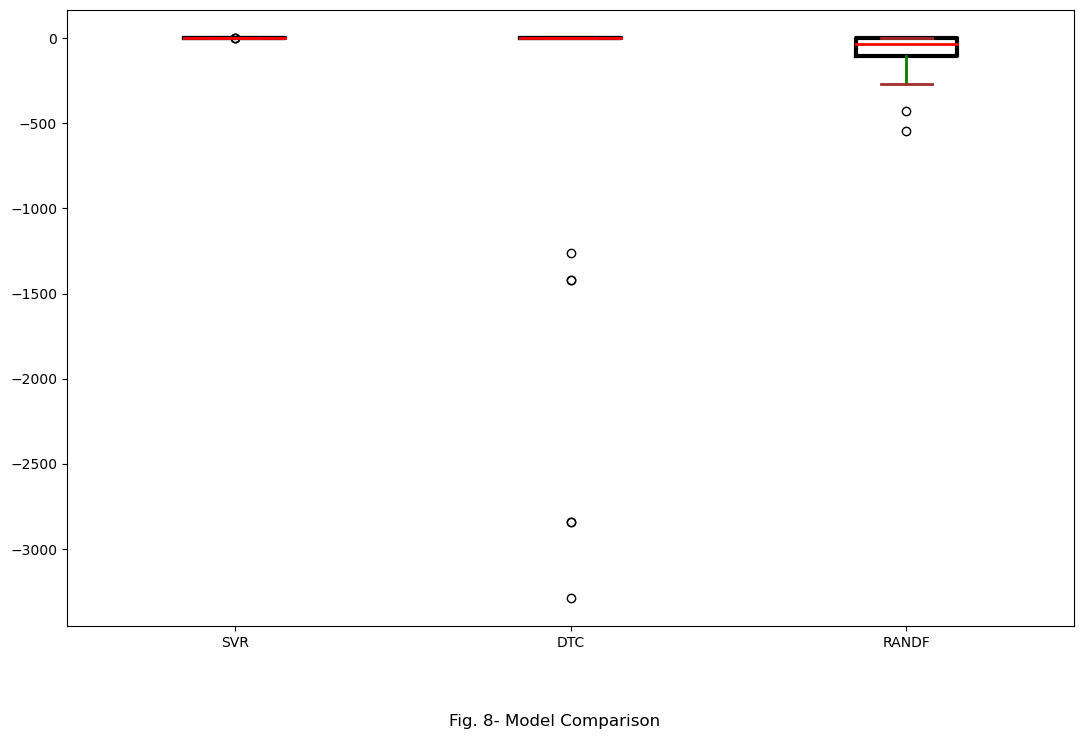

In [42]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(13,8))
fig.suptitle("Fig. 8- Model Comparison",y=-.0001)
ax = fig.add_subplot(111)
medianprops = {'color': 'red', 'linewidth': 2}
boxprops = {'color': 'black', 'linewidth': 3,'linestyle': '-'}
whiskerprops = {'color': 'green', 'linewidth': 2,'linestyle': '-'}
capprops = {'color': 'brown',  'linewidth': 2,'linestyle': '-'}
flierprops = {'color': 'purple', 'marker': 'o'}
plt.boxplot(results,       
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           flierprops=flierprops)
ax.set_xticklabels(names)
plt.show()
fig.savefig('compare.png')